#TRATAMIENTO DE VARIABLES CATEGÓRICAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
url = 'https://raw.githubusercontent.com/javilledo/python-ml-course/master/datasets/ecom-expense/Ecom%20Expense.csv'
data = pd.read_csv(url)
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [3]:
dummy_gender = pd.get_dummies(data['Gender'], prefix='Gender')
dummy_city_tier = pd.get_dummies(data['City Tier'], prefix='City')

In [4]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [5]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [6]:
data = data.join(dummy_gender).join(dummy_city_tier)
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [7]:
feature_cols = ['Monthly Income', 'Transaction Time', 'Gender_Female', 'Gender_Male', 'City_Tier 1', 'City_Tier 2', 'City_Tier 3']

In [8]:
X = data[feature_cols]
Y = data['Total Spend']

In [9]:
lm = LinearRegression().fit(X,Y)

In [10]:
print(lm.intercept_)
print(lm.coef_)

3655.729407690652
[   0.15297825    0.12372609  -94.15779883   94.15779883  119.6632516
  -16.67901801 -102.9842336 ]


In [11]:
dict_coefs = zip(feature_cols,lm.coef_) #LOS ZIP CREAN UN ARRAY DE TUPLAS
list(dict_coefs) #OJO QUE LOS ZIP SE LISTAN

[('Monthly Income', 0.15297824609320523),
 ('Transaction Time', 0.1237260864262),
 ('Gender_Female', -94.15779883032013),
 ('Gender_Male', 94.1577988303201),
 ('City_Tier 1', 119.66325160390102),
 ('City_Tier 2', -16.679018007990496),
 ('City_Tier 3', -102.9842335959106)]

In [12]:
lm.score(X,Y)

0.19478920552885381

In [13]:
#como resulta un r2 (score) bastante bajo, vamos a incluir el campo 'Record' en el entrenamiento
feature_cols = ['Monthly Income', 'Transaction Time', 'Gender_Female', 'Gender_Male', 'City_Tier 1', 'City_Tier 2', 'City_Tier 3', 'Record']
X = data[feature_cols]
Y = data['Total Spend']
lm = LinearRegression().fit(X,Y)
dict_coefs = zip(feature_cols,lm.coef_)
list(dict_coefs)
lm.score(X,Y)

0.9179923586131016

In [14]:
data['predict'] = lm.predict(data[feature_cols])
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,predict
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [15]:
SSD = np.sum((data['predict'] - data['Total Spend'])**2)
SSD

1517733985.3408163

In [16]:
RSE = np.sqrt(SSD/(len(data) - len(feature_cols) - 1))
RSE

803.1318809818165

In [17]:
error = RSE / np.mean(data['Total Spend'])
error

0.13031135680294162

In [18]:
lm.intercept_

-79.41713030137544

In [19]:
dict_coefs = zip(feature_cols,lm.coef_)
list(dict_coefs)

[('Monthly Income', 0.14753898049205746),
 ('Transaction Time', 0.15494612549589704),
 ('Gender_Female', -131.02501325554584),
 ('Gender_Male', 131.02501325554567),
 ('City_Tier 1', 76.76432601049501),
 ('City_Tier 2', 55.13897430923278),
 ('City_Tier 3', -131.90330031972783),
 ('Record', 772.233445744565)]

El resumen final de los modelos de regresión lineal serían los siguientes:
* **GENERAL:** Total Spend = -79.41713030137544 + 0.14753898049205746 * 'Monthly Income' + 0.15494612549589704 * 'Transaction Time' - 131.02501325554584 * 'Gender_Female' + 131.02501325554567 * 'Gender_Male' + 76.76432601049501 * 'City_Tier 1' + 55.13897430923278 * 'City_Tier 2' - 131.90330031972783 * 'City_Tier 3' + 772.233445744565 * 'Record'
* **Si es hombre y vive en CT1:** Total Spend = -79.41713030137544 + 0.14753898049205746 * 'Monthly Income' + 0.15494612549589704 * 'Transaction Time' + 131.02501325554567 + 76.76432601049501 + 772.233445744565 * 'Record' = 128.37220896466525 + 0.14753898049205746 * 'Monthly Income' + 0.15494612549589704 * 'Transaction Time' + 772.233445744565 * 'Record'
* **Si es hombre y vive en CT2:** Total Spend = -79.41713030137544 + 0.14753898049205746 * 'Monthly Income' + 0.15494612549589704 * 'Transaction Time' + 131.02501325554567 + 55.13897430923278 + 772.233445744565 * 'Record' = 106.74685726340302 + 0.14753898049205746 * 'Monthly Income' + 0.15494612549589704 * 'Transaction Time' + 772.233445744565 * 'Record'
* **Si es hombre y vive en CT3:** GENERAL: Total Spend = -79.41713030137544 + 0.14753898049205746 * 'Monthly Income' + 0.15494612549589704 * 'Transaction Time' + 131.02501325554567 - 131.90330031972783 + 772.233445744565 * 'Record' = -80.2954173655576 + 0.14753898049205746 * 'Monthly Income' + 0.15494612549589704 * 'Transaction Time' + 772.233445744565 * 'Record'
* **Si es mujer y vive en CT1:** Total Spend = -79.41713030137544 + 0.14753898049205746 * 'Monthly Income' + 0.15494612549589704 * 'Transaction Time' - 131.02501325554567 + 76.76432601049501 + 772.233445744565 * 'Record' = -133.6778175464261 + 0.14753898049205746 * 'Monthly Income' + 0.15494612549589704 * 'Transaction Time' + 772.233445744565 * 'Record'
* **Si es mujer y vive en CT2:** Total Spend = -79.41713030137544 + 0.14753898049205746 * 'Monthly Income' + 0.15494612549589704 * 'Transaction Time' - 131.02501325554567 + 55.13897430923278 + 772.233445744565 * 'Record' = -155.30316924768834 + 0.14753898049205746 * 'Monthly Income' + 0.15494612549589704 * 'Transaction Time' + 772.233445744565 * 'Record'
* **Si es mujer y vive en CT3:** Total Spend = -79.41713030137544 + 0.14753898049205746 * 'Monthly Income' + 0.15494612549589704 * 'Transaction Time' + 131.02501325554567 - 131.90330031972783 + 772.233445744565 * 'Record' = -342.3454438766489 + 0.14753898049205746 * 'Monthly Income' + 0.15494612549589704 * 'Transaction Time' + 772.233445744565 * 'Record'

Al categorizarlo lo que va cambiando es el término independiente

Pero realmente, hay variables categóricas que por descarte podrían darse. Por ejemplo, si no es hombre es mujer, y si no vive ni en CT1 ni en CT2, vivirá en CT3. En ese caso, si no los incluimos, pasaran a formar parte del término independiente. En definitiva, sería tomar la expresión general y hacer 1 los valores de las variables que tomaremos como de descarte

In [20]:
#Ahora entrenaremos el modelo descartando una variable dummy por cada categoría
feature_cols = ['Monthly Income', 'Transaction Time', 'Gender_Male', 'City_Tier 2', 'City_Tier 3', 'Record']
data_new = data[feature_cols]
data_new.head()

,Monthly Income,Transaction Time,Gender_Male,City_Tier 2,City_Tier 3,Record
0,7313,627.668127,0,0,0,5
1,17747,126.904567,0,1,0,3
2,22845,873.469701,1,1,0,2
3,18552,380.219428,0,0,0,7
4,14439,403.374223,0,1,0,2


In [21]:
X = data_new
Y = data['Total Spend']
lm = LinearRegression().fit(X,Y)

In [22]:
lm.intercept_

-133.67781754642238

In [23]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1475389804920575),
 ('Transaction Time', 0.1549461254958966),
 ('Gender_Male', 262.0500265110957),
 ('City_Tier 2', -21.625351701263007),
 ('City_Tier 3', -208.6676263302229),
 ('Record', 772.2334457445636)]

In [24]:
lm.score(X,Y) #El modelo es exactamente el mismo

0.9179923586131016

Con estos coeficientes pueden obtenerse exactamente las mismas combinaciones que en caso anterior

#TRANSFORMACIÓN DE VARIABLES PARA RELACIÓN NO LINEAL

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [26]:
url = 'https://raw.githubusercontent.com/javilledo/python-ml-course/master/datasets/auto/auto-mpg.csv'
data_auto = pd.read_csv(url)
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [27]:
data_auto.shape

(406, 9)

In [28]:
data_auto.isna().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [29]:
data_auto['horsepower'] = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
data_auto['mpg'] = data_auto['mpg'].fillna(data_auto['mpg'].mean())
data_auto.isna().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [30]:
data_auto.shape

(406, 9)

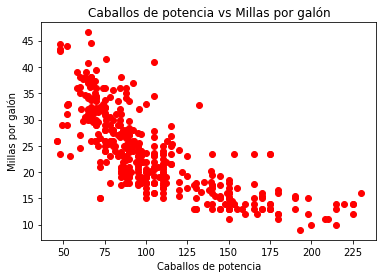

In [31]:
plt.plot(data_auto['horsepower'], data_auto['mpg'], 'ro')
plt.xlabel('Caballos de potencia')
plt.ylabel('Millas por galón')
plt.title('Caballos de potencia vs Millas por galón')
plt.show()

## MODELO DE REGRESIÓN LINEAL
mpg = a + b * horsepower

In [32]:
X = pd.DataFrame(data_auto['horsepower']) #OJO que las X las quiere como DataFrame
Y = data_auto['mpg']
lm = LinearRegression().fit(X, Y)

In [33]:
lm.score(X,Y)

0.574653340645025

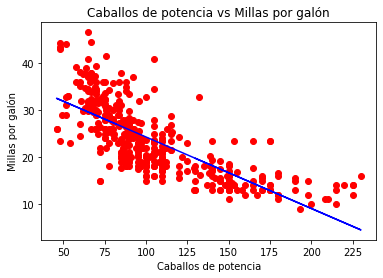

In [34]:
plt.plot(data_auto['horsepower'], data_auto['mpg'], 'ro')
plt.xlabel('Caballos de potencia')
plt.ylabel('Millas por galón')
plt.title('Caballos de potencia vs Millas por galón')
plt.plot(X, lm.predict(X), color='blue')
plt.show()

In [35]:
SSD = np.sum((Y-lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(X)-1))
error = RSE / Y.mean()
SSD, RSE, error

(10315.75196006092, 5.046879480825511, 0.21462773361633458)

## MODELO DE REGRESIÓN CUADRÁTICO
mpg = a + b * horsepower^2



In [36]:
X = pd.DataFrame(data_auto['horsepower']**2)
Y = data_auto['mpg']
lm = LinearRegression().fit(X,Y)
lm.intercept_, lm.coef_,lm.score(X,Y)

(30.405683105007363, array([-0.00055043]), 0.4849887034823205)

In [37]:
SSD = np.sum((Y-lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(X)-1))
error = RSE / Y.mean()
SSD, RSE, error

(12490.350340501926, 5.553410772769817, 0.236168898529981)

## MODELO DE REGRESIÓN LINEAL Y CUADRÁTICO
mpg = a + b * horsepower + c * horsepower^2

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [39]:
#haciéndolo como antes...
X = pd.DataFrame(data_auto['horsepower'])
X['horsepower^2'] = X['horsepower']**2
Y = data_auto['mpg']
lm = LinearRegression().fit(X,Y)
lm.intercept_, lm.coef_,lm.score(X,Y)

(55.02619244708072, array([-0.43404318,  0.00112615]), 0.6439066584257469)

In [40]:
Y_predict = lm.predict(X)

In [41]:
data_to_plot = pd.DataFrame(data_auto['horsepower'])
data_to_plot['y_predict'] = Y_predict
data_to_plot = data_to_plot.sort_values(by=['horsepower'],axis=0,ascending=True)
data_to_plot

,horsepower,y_predict
109,46.0,37.443133
25,46.0,37.443133
251,48.0,36.786762
39,48.0,36.786762
332,48.0,36.786762
...,...,...
6,220.0,14.042198
102,225.0,14.377659
8,225.0,14.377659
19,225.0,14.377659


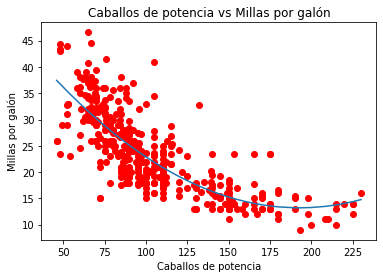

In [42]:
plt.plot(data_auto['horsepower'], data_auto['mpg'], 'ro')
plt.xlabel('Caballos de potencia')
plt.ylabel('Millas por galón')
plt.title('Caballos de potencia vs Millas por galón')
plt.plot(data_to_plot['horsepower'], data_to_plot['y_predict'])
plt.show()

In [43]:
#y ahora haciéndolo con PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(pd.DataFrame(data_auto['horsepower']))
Y = data_auto['mpg']
lm = linear_model.LinearRegression().fit(X,Y) #ojo que aquí se mete el linear_model
lm.intercept_, lm.coef_, lm.score(X,Y)

(55.026192447081144,
 array([ 0.        , -0.43404318,  0.00112615]),
 0.6439066584257469)

In [44]:
#como hemos hecho varias veces la obtención de errores, vamos a crear una función
def regression_validation(X, Y, Y_predict):
  SSD = np.sum((Y-Y_predict)**2)
  RSE = np.sqrt(SSD/(len(X)-1))
  error = RSE / Y.mean()
  return {
      'SSD': SSD,
      'RSE': RSE,
      'error': error
  }

In [45]:
regression_validation(X, Y, lm.predict(X))

{'RSE': 4.61778115803654,
 'SSD': 8636.180643524502,
 'error': 0.1963795466190689}

#EL PROBLEMA DE LOS OUTLIERS

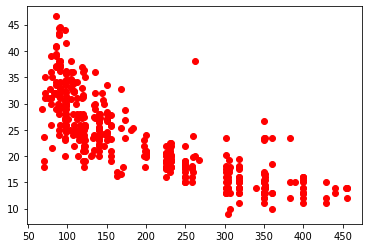

In [48]:
plt.plot(data_auto['displacement'], data_auto['mpg'],'ro')

In [54]:
X = pd.DataFrame(data_auto['displacement'])
Y = data_auto['mpg']
lm = LinearRegression().fit(X,Y)
lm.score(X,Y)

0.6261049762826918

In [61]:
#para quitar el outlier se trata de buscar de la gráfica
data_auto[(data_auto['displacement']>250) & (data_auto['mpg']>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


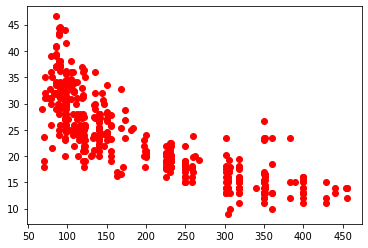

In [62]:
data_auto_clean = data_auto.drop(index = 395)
plt.plot(data_auto_clean['displacement'], data_auto_clean['mpg'],'ro')

In [64]:
X = pd.DataFrame(data_auto_clean['displacement'])
Y = data_auto_clean['mpg']
lm = LinearRegression().fit(X,Y)
lm.score(X,Y)

0.6369775831790434